In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statistics

In [6]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4plus_categories_explicit.csv')
reader = pd.read_csv(file, delimiter=',')

In [7]:
reader[16:25]

,chr,start,end,type,distClosestG4,CGI,Ori,TSS,sequence
16,chr1,28893,28915,Bulge,134,1,0,0,GGGACCAGGAGCTCCGGGCGGG
17,chr1,29048,29073,Canonical,134,1,0,0,GGGCCGGGCAAGGCCGGGTGCAGGG
18,chr1,32088,32114,GVBQ,1156,0,0,0,GGCCAGCTGGGCTGAGCGGGCCTGGG
19,chr1,33269,33294,Canonical,1076,0,0,0,ggggctaaggggaggggagaatggg
20,chr1,34369,34388,Canonical,634,0,0,0,GGGGAGGGTGGGCAAAGGG
21,chr1,35021,35039,GVBQ,634,0,0,0,GGGAGAGGGGTGGAGGGG
22,chr1,36080,36104,GVBQ,154,0,0,0,GGGAGCTGGGCACAGGGCAGCAGG
23,chr1,36257,36289,Bulge,154,0,0,0,GGGTGGCTCTGAGGGGGCTCTCAGGGGTGGGG
24,chr1,36848,36871,Bulge,560,0,0,0,GGGTGCTGGCGATGGGGTGGGGG


### Création des fichiers de comparaison

### A ne pas refaire tourner

In [7]:
for i in range (1,23):
    test = reader[(reader['chr'] == f'chr{i}')]
    test = test[['chr','start','end']]
    test = test.sort_values(['start','end'])
    test['chr'] = i
    path = f"c:/Users/BlueC/Documents/Mines/Santé/Code/np_{i}.txt"
    np.savetxt(path, test.values, fmt='%s', delimiter='\t')

In [8]:
for i in (['X','Y']):
    test = reader[(reader['chr'] == f'chr{i}')]
    test = test[['chr','start','end']]
    test = test.sort_values(['start','end'])
    test['chr'] = i
    path = f"c:/Users/BlueC/Documents/Mines/Santé/Code/np_{i}.txt"
    np.savetxt(path, test.values, fmt='%s', delimiter='\t')


### Analyse des données en sortie

In [3]:
file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_1_2')
my_col = ['chr', 'pos', 'name', 'orig', 'mut', '%', 'PASS','INFOS', 'AA']
separateurs = "\t|AA="
reader2 = pd.read_csv(file2, sep = separateurs, names = my_col, header = None, engine ='python')
reader2 = reader2.drop_duplicates()
reader2 = reader2.reset_index(drop=True)

In [4]:
reader2

,chr,pos,name,orig,mut,%,PASS,INFOS,AA
0,1,11008,rs575272151,C,G,100,PASS,AC=441;AF=0.0880591;AN=5008;NS=2504;DP=2232;EA...,.|||;VT=SNP
1,1,11012,rs544419019,C,G,100,PASS,AC=441;AF=0.0880591;AN=5008;NS=2504;DP=2090;EA...,.|||;VT=SNP
2,1,11063,rs561109771,T,G,100,PASS,AC=15;AF=0.00299521;AN=5008;NS=2504;DP=2834;EA...,.|||;VT=SNP
3,1,14674,rs561913721,G,A,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=26402;E...,g|||;VT=SNP;EX_TARGET
4,1,16738,rs549612027,G,A,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=16499;E...,g|||;VT=SNP
...,...,...,...,...,...,...,...,...,...
65961,1,249240217,rs570135855;rs556759920,G,"GT,T",100,PASS,"AC=368,183;AF=0.0734824,0.0365415;AN=5008;NS=2...",None
65962,1,249240219,rs370070114,A,T,100,PASS,AC=1454;AF=0.290335;AN=5008;NS=2504;DP=149437;...,.|||;VT=SNP
65963,1,249240537,rs549505823,GGT,G,100,PASS,AC=2272;AF=0.453674;AN=5008;NS=2504;DP=66563;E...,None
65964,1,249240539,rs545682552,T,G,100,PASS,AC=1682;AF=0.335863;AN=5008;NS=2504;DP=56555;E...,.|||;VT=SNP


In [5]:
file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_1')
my_col = ['chr', 'pos', 'name', 'orig', 'mut', '%', 'PASS','INFOS', 'AA']
separateurs = "\t|AA="
reader3 = pd.read_csv(file2, sep = separateurs, names = my_col, header = None, engine ='python')
reader3 = reader3.drop_duplicates()
reader3 = reader3.reset_index(drop=True)

In [6]:
reader2['pos']

0            11008
1            11012
2            11063
3            14674
4            16738
           ...    
65961    249240217
65962    249240219
65963    249240537
65964    249240539
65965    249240543
Name: pos, Length: 65966, dtype: int64

In [12]:
list_chr = [str(i+1) for i in range (22)] + ['X','Y']
nb_mutations = []
nb_G4 = []
for i in (list_chr):
    file2 = open(f'C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_{i}_final.csv')
    reader2 = pd.read_csv(file2)
    reader2 = reader2.drop_duplicates()
    n = len(reader2)
    nb_mutations.append(n)
    
    nb_G4.append(len(reader[reader['chr'] == f'chr{i}']))

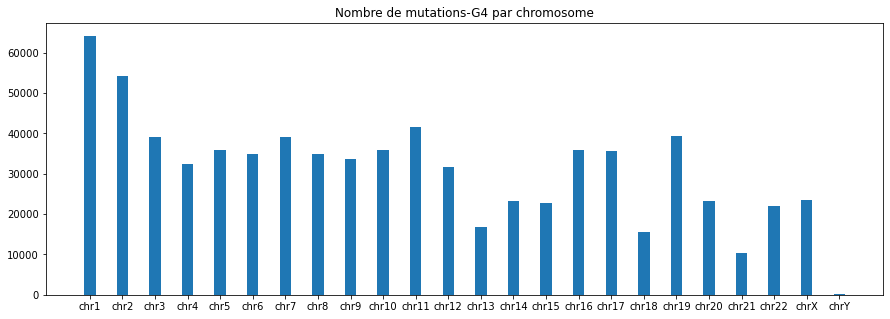

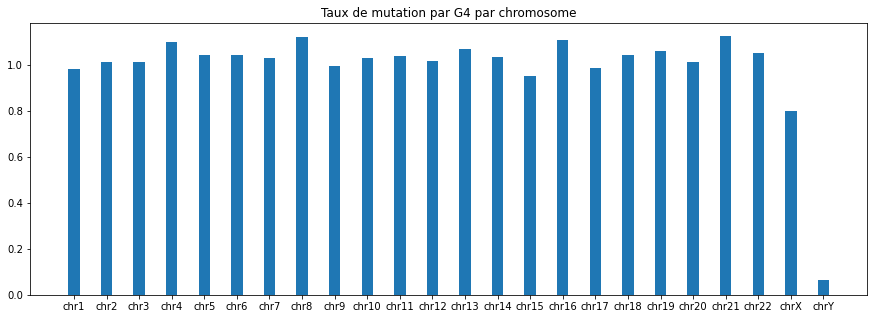

In [13]:
largeur = .35
labels = ['chr'+i for i in list_chr]

fig, ax = plt.subplots(figsize = (15,5))
x = [i for i in range(24)]

plt.bar(x,nb_mutations,largeur)

ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.title('Nombre de mutations-G4 par chromosome')

plt.show()
    
fig, ax = plt.subplots(figsize = (15,5))
x = [i for i in range(24)]

plt.bar(x,np.array(nb_mutations).astype(float)/np.array(nb_G4).astype(float),largeur)

ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.title('Taux de mutation par G4 par chromosome')
plt.show()

### Etude primitive des données

##### Stat des mutations

In [18]:
file = open('C:/Users/BlueC/Documents/Mines/Santé/Code/annotated_G4plus_categories_explicit.csv')
reader = pd.read_csv(file)
reader = reader[reader['type'] != 'G-track']
reader = reader[reader['chr'] == 'chr1']
reader

,chr,start,end,type,distClosestG4,CGI,Ori,TSS,sequence
0,chr1,11008,11026,Canonical,33,0,0,0,gggcgggggttggggggg
1,chr1,11058,11078,Canonical,33,0,0,0,gggctggggcggggggaggg
2,chr1,12487,12514,Bulge,1410,0,0,0,GGGTGGTAGGTGCAGAGACGGGAGGGG
3,chr1,14664,14683,Bulge,1267,0,0,0,GGGTCTGGGGGGGAAGGTG
4,chr1,15949,15973,Bulge,687,0,0,0,GGAGCCGGGAGGTGGGGAACAGGG
...,...,...,...,...,...,...,...,...,...
65253,chr1,249205923,249205946,GVBQ,55,0,0,0,ggggcggctggccgggcgggggg
65254,chr1,249219027,249219045,GVBQ,469,0,0,0,GGCTCTGGGAGGGCAGGG
65255,chr1,249219513,249219532,GVBQ,469,0,0,0,GGAAGGGCGGGCAGTGGGG
65256,chr1,249233011,249233033,Bulge,6333,0,0,0,gggagggacccagtgggaggtg


In [20]:
file2 = open('C:/Users/BlueC/Documents/Mines/Santé/Code/chr/chr_1_final.csv')
reader2 = pd.read_csv(file2, delimiter=',')
reader2=reader2[reader2['type'] != 'G-track']
reader2['length'] = reader2['end'] - reader2['start'] + 1
reader2

,chr,pos,name,orig,mut,%,PASS,INFOS,AA,start,end,type,distClosestG4,CGI,Ori,TSS,sequence,length
0,1,11008,rs575272151,C,G,100,PASS,AC=441;AF=0.0880591;AN=5008;NS=2504;DP=2232;EA...,.|||;VT=SNP,11008,11026,Canonical,33,0,0,0,gggcgggggttggggggg,19
1,1,11012,rs544419019,C,G,100,PASS,AC=441;AF=0.0880591;AN=5008;NS=2504;DP=2090;EA...,.|||;VT=SNP,11008,11026,Canonical,33,0,0,0,gggcgggggttggggggg,19
2,1,11063,rs561109771,T,G,100,PASS,AC=15;AF=0.00299521;AN=5008;NS=2504;DP=2834;EA...,.|||;VT=SNP,11058,11078,Canonical,33,0,0,0,gggctggggcggggggaggg,21
3,1,14674,rs561913721,G,A,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=26402;E...,g|||;VT=SNP;EX_TARGET,14664,14683,Bulge,1267,0,0,0,GGGTCTGGGGGGGAAGGTG,20
4,1,16738,rs549612027,G,A,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=16499;E...,g|||;VT=SNP,16707,16739,Bulge,20,0,0,0,GGAGCtgggggtggtggtgggggcggtggggg,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64143,1,249201698,rs371468905,G,C,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=19811;E...,G|||;VT=SNP,249201677,249201698,GVBQ,703,0,1,0,gggtgtcgggctgggggacgg,22
64144,1,249204093,rs192052253,G,T,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=20949;E...,g|||;VT=SNP,249204075,249204095,Bulge,638,0,0,0,GGGTCGGGATGAGGCTGGGG,21
64145,1,249205859,rs548520369,G,A,100,PASS,AC=3;AF=0.000599042;AN=5008;NS=2504;DP=12079;E...,-|||;VT=SNP,249205845,249205869,GVBQ,55,0,0,0,ggggcggctggccgggcagagggg,25
64146,1,249205937,rs6689768,G,T,100,PASS,AC=2965;AF=0.592053;AN=5008;NS=2504;DP=12265;E...,-|||;VT=SNP,249205923,249205946,GVBQ,55,0,0,0,ggggcggctggccgggcgggggg,24


In [21]:
cluster2 = reader2[reader2['distClosestG4'] <= 100]
cluster2 = cluster2[['start','end','type']]
cluster2 = cluster2.drop_duplicates()
cluster2 = cluster2.reset_index(drop=True)

cluster = reader[reader['distClosestG4'] <= 100]

In [22]:
nb_cluster = len(cluster2)
nb_cluster_i = len(cluster)
print("nb de G4 mutés en cluster : ",  nb_cluster)
print("Taux de G4 mutés en cluster : ", nb_cluster/len(reader2)*100, "%") #mutés en cluster / mutés
print("Taux de G4 en cluster : ", len(cluster)/len(reader)*100, "%")

nb de G4 mutés en cluster :  9329
Taux de G4 mutés en cluster :  14.607832391212439 %
Taux de G4 en cluster :  25.545415437561452 %


In [23]:
G4_mutated = reader2[['start','end','type']]
G4_mutated = G4_mutated.drop_duplicates()

In [24]:
nb_clust_i = len(reader[reader['distClosestG4'] <= 100])
print("Taux de G4 en cluster ayant muté :", nb_cluster/nb_clust_i*100, "%")
print("Taux de G4 ayant muté :", len(G4_mutated)/len(reader)*100, "%")


Taux de G4 en cluster ayant muté : 56.107535935526556 %
Taux de G4 ayant muté : 58.51616273352999 %


In [25]:
print("Nombre de mutations en cluster : ", len(reader2[reader2['distClosestG4'] <= 100]))
print("Nombre de mutations : ", len(reader2))
print("Taux de mutations en cluster : ", len(reader2[reader2['distClosestG4'] <= 100])/ reader2[reader2['distClosestG4'] <= 100]['length'].sum()*100, "%")
print("Taux de mutations non clusterisées : ", len(reader2[reader2['distClosestG4'] > 100])/ reader2[reader2['distClosestG4'] > 100]['length'].sum()*100, "%")

Nombre de mutations en cluster :  15550
Nombre de mutations :  63863
Taux de mutations en cluster :  3.4861953390352993 %
Taux de mutations non clusterisées :  3.6581025992040654 %


In [13]:
cat = reader2['type']

nb_can = len(reader2[cat == 'Canonical'])
nb_bulg = len(reader2[cat == 'Bulge'])
nb_gtrack = len(reader2[cat == 'G-track'])
nb_gvbq = len(reader2[cat == 'GVBQ'])
nb_longloop = len(reader2[cat == 'LongLoop'])

In [14]:
ori = reader2[reader2['Ori'] > 0]
tss = reader2[reader2['TSS'] > 0]
print("Pourcentage de G4 mutés proche d'une Ori : ", len(ori)/len(reader2)*100, "%")
print("Pourcentage de G4 mutés proche d'un TSS : ", len(tss)/len(reader2)*100, "%")

ori_cluster = len(ori[ori['distClosestG4']<101])
tss_cluster = len(tss[tss['distClosestG4']<101])

ori_canonical = len(ori[ori['type'] == 'Canonical'])
tss_canonical = len(tss[tss['type'] == 'Canonical'])

ori_bulge = len(ori[ori['type'] == 'Bulge'])
tss_bulge = len(tss[tss['type'] == 'Bulge'])

ori_gtrack = len(ori[ori['type'] == 'G-track'])
tss_gtrack = len(tss[tss['type'] == 'G-track'])

ori_GVBQ = len(ori[ori['type'] == 'GVBQ'])
tss_GVBQ = len(tss[tss['type'] == 'GVBQ'])

ori_longloop = len(ori[ori['type'] == 'LongLoop'])
tss_longloop = len(tss[tss['type'] == 'LongLoop'])

Pourcentage de G4 mutés proche d'une Ori :  37.814934966497894 %
Pourcentage de G4 mutés proche d'un TSS :  8.395233908377042 %


In [26]:
count_mut = reader2[['orig','mut']]
count_mut['number'] = 1
count_mut

<ipython-input-26-8407e140c760>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_mut['number'] = 1


,orig,mut,number
0,C,G,1
1,C,G,1
2,T,G,1
3,G,A,1
4,G,A,1
...,...,...,...
64143,G,C,1
64144,G,T,1
64145,G,A,1
64146,G,T,1


In [27]:
count_orig = count_mut[['orig','number']].groupby(['orig']).sum()
count_orig = count_orig.reset_index()

### Analyse des nucléotides

In [1]:
nb_G_G4 = 356722 + 688558
nb_C_G4 = 133607 + 113318
nb_A_G4 = 168955 + 89886
nb_T_G4 = 135713 + 62185
#chiffres trouvés après analyse bash des fichiers 

In [63]:
taux_G = float(count_orig[count_orig['orig'] == 'G']['number'] / nb_G_G4)
taux_C = float(count_orig[count_orig['orig'] == 'C']['number'] / nb_C_G4)
taux_A = float(count_orig[count_orig['orig'] == 'A']['number'] / nb_A_G4)
taux_T = float(count_orig[count_orig['orig'] == 'T']['number'] / nb_T_G4)

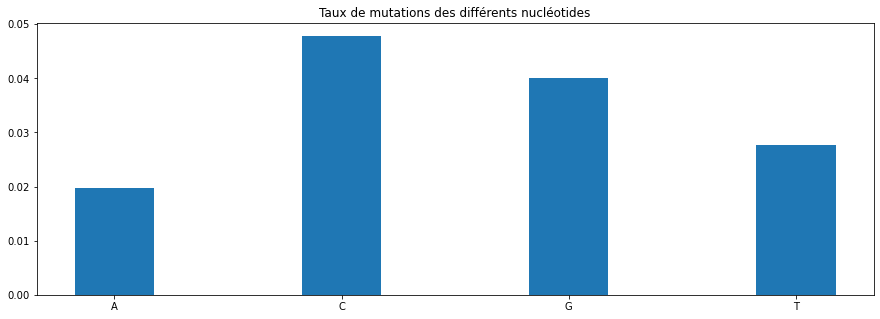

In [72]:
largeur = .35
labels = ['A','C','G','T']

fig, ax = plt.subplots(figsize = (15,5))
x = [i for i in range(4)]

plt.bar(x,np.array([taux_A,taux_C,taux_G,taux_T]),largeur)

ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.title('Taux de mutations des différents nucléotides')

plt.show()

Pas vraiment ce à quoi on s'attendait : les G sont en deuxième position dans les plus fréquentes mutations. 
A voir si les G en question sont les G concernés par le G4 ou s'il s'agit des "liants"